In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv(r"C:\Users\ACER\Desktop\ml_datasets\boston_house_price\BostonHousing.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# df info

(1)crim: Per capita crime rate by town.(2)
zn: Proportion of large residential lots (over 25,000 sq. ft.).(3)
indus: Proportion of non-retail business acres per town(4).
Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for n.o(5) ).
nox: Concentration of nitrogen oxides in the a(6)ir.
rm: Average number of rooms per dwell(7)ing.
age: Proportion of old owner-occupied units built before (8)1940.
dis: Weighted distances to Boston employment ce(9)nters.
rad: Index of accessibility to radial hi(10)ghways.
tax: Property tax rate per $10,000.
These features provide valuable information about the characteristics of neighborhoods that can influence housing prices.

# Exploratory Data Analysis (EDA) 

In [18]:
#to see if there is any null values present in the data set
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [30]:
#finding and then filling  the missing values with the median vlaue
column_median = df['rm'].median()
print('rm median:  ',column_median)
df['rm'].fillna(column_median, inplace=True)

rm median:   6.208


In [31]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [32]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [15]:
correlation_matrix = df.corr()

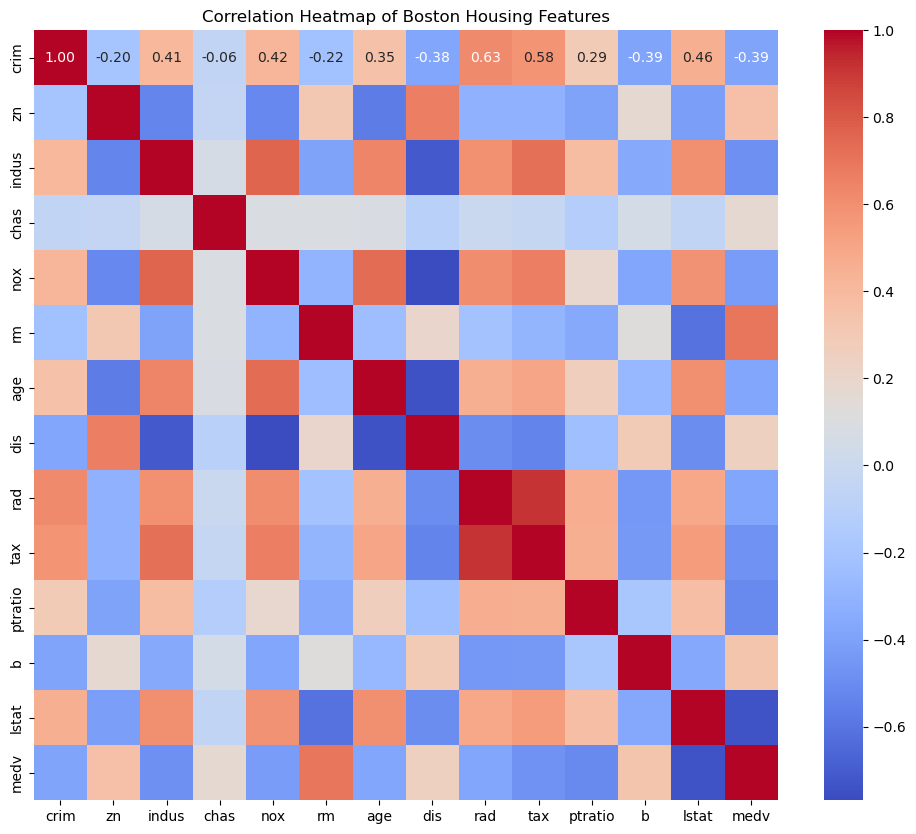

Correlation of features with MEDV:
medv       1.000000
rm         0.696169
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


In [33]:
# 3. Set up the plot size for better visibility
plt.figure(figsize=(12, 10))

# 4. Create the heatmap using seaborn
# `annot=True` adds the correlation values on top of the cells.
# `cmap='coolwarm'` sets a nice color scheme.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# 5. Add a title to the plot
plt.title('Correlation Heatmap of Boston Housing Features')

# 6. Display the plot
plt.show()

# 7. Print the correlation of all features with the target variable 'MEDV'
print("Correlation of features with MEDV:")
print(correlation_matrix['medv'].sort_values(ascending=False))

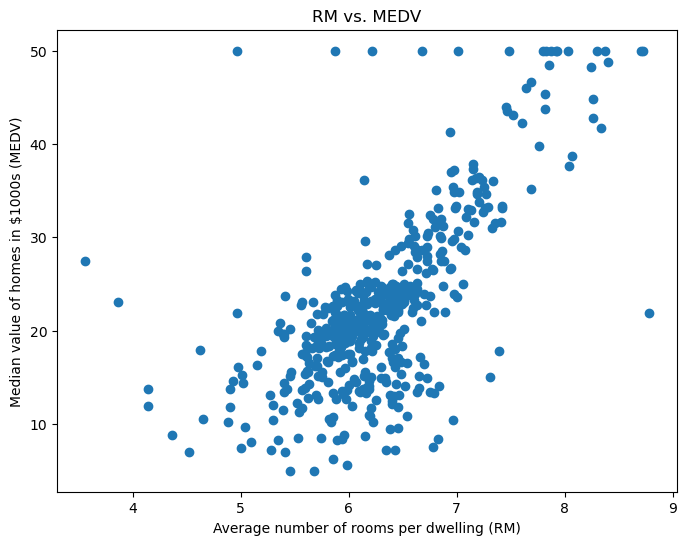

In [36]:

plt.figure(figsize=(8, 6))
plt.scatter(df['rm'], df['medv'])
plt.title('RM vs. MEDV')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of homes in $1000s (MEDV)')
plt.show()

In [38]:
# 'X' contains all other columns (features)
X = df.drop('medv', axis=1)
# 'y' is the target variable (MEDV)
y = df['medv']



In [39]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
LR_model = LinearRegression()

In [49]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Use the trained model to make predictions on the test set
y_pred = LR_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error (MSE): 24.46
R-squared (R2) Score: 0.67


# Making prediction  with the new dataset

In [56]:
import pandas as pd
import numpy as np

new_house_data = pd.DataFrame(
    [
        [0.05, 15.0, 5.5, 0, 0.45, 6.5, 40.0, 5.0, 4, 300, 18.0, 350.0, 5.0]
    ],
    columns=X.columns
)
predicted_price = LR_model.predict(new_house_data)

print(f"The predicted price of the new house is: ${predicted_price[0]*1000:.2f}")

The predicted price of the new house is: $27682.21
